In [5]:
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
import matplotlib.pyplot as plt

### CLT - simulation

/Users/jurajkapasny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


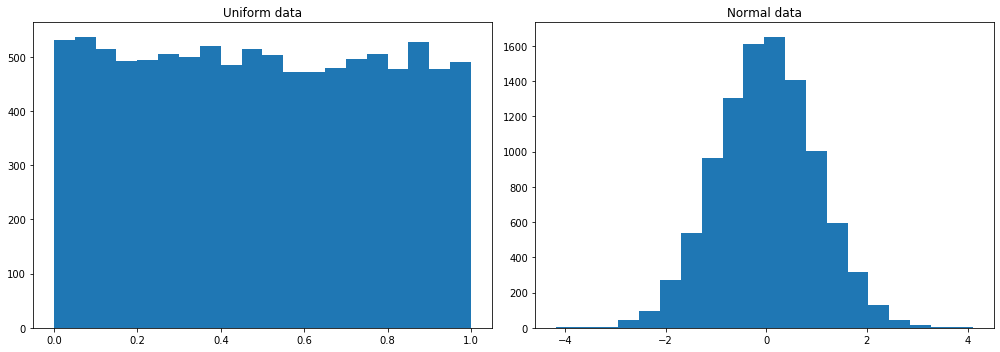

In [9]:
#
uniform = np.random.rand(10000)
normal = np.random.randn(10000)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, 20)
ax1.set_title('Uniform data')
ax2.hist(normal, 20)
ax2.set_title('Normal data')
fig.tight_layout()
fig.show();

In [20]:
# proof of clt
def clt_example(dist, iterations, size):
    mean_dist = np.empty(iterations)
    for i in range(iterations):
        mean_dist[i] = np.mean(np.random.choice(dist, size = size, replace=False))
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.hist(mean_dist, 20)
    ax1.set_title('Distribution of sample means')
    fig.tight_layout()
    fig.show();

/Users/jurajkapasny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


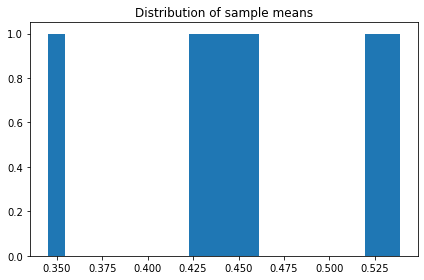

In [26]:
clt_example(uniform, 7, 10)

### How many samples do we have to take, so the distribution of means of these samples will pass the shapiro-wilk test for normality if population is from Uniform or Normal distribution?
+ Suppose the population is 10000 observation.
+ Suppose sample size is always 50

In [91]:
from scipy.stats import shapiro

In [161]:
# proof of clt
def clt(dist, size=50):
    number_of_samples = 3
    mean_dist = []
    # this loop has to be in , because shapiro test works with minimum of 3 values
    for i in range(number_of_samples):
        mean_dist.append(np.mean(np.random.choice(dist, size = size, replace=False)))
    p_value = shapiro(mean_dist)[1]
    # looping untile the test passes
    while p_value <= 0.05:
        mean_dist.append(np.mean(np.random.choice(dist, size = size, replace=False)))
        p_value = shapiro(mean_dist)[1]
        number_of_samples += 1
        if number_of_samples == 10000:
            break
    return mean_dist, p_value, number_of_samples

In [167]:
clt(uniform)

([0.4837458052529317, 0.43885251099076394, 0.5079086921366198],
 0.6722403168678284,
 3)